<a href="https://www.kaggle.com/code/atalayoguzkaan/waiters-tips?scriptVersionId=200645560" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tipping/tips.csv


In [2]:
df_tips = pd.read_csv('/kaggle/input/tipping/tips.csv')
df_tips 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [4]:
df_tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


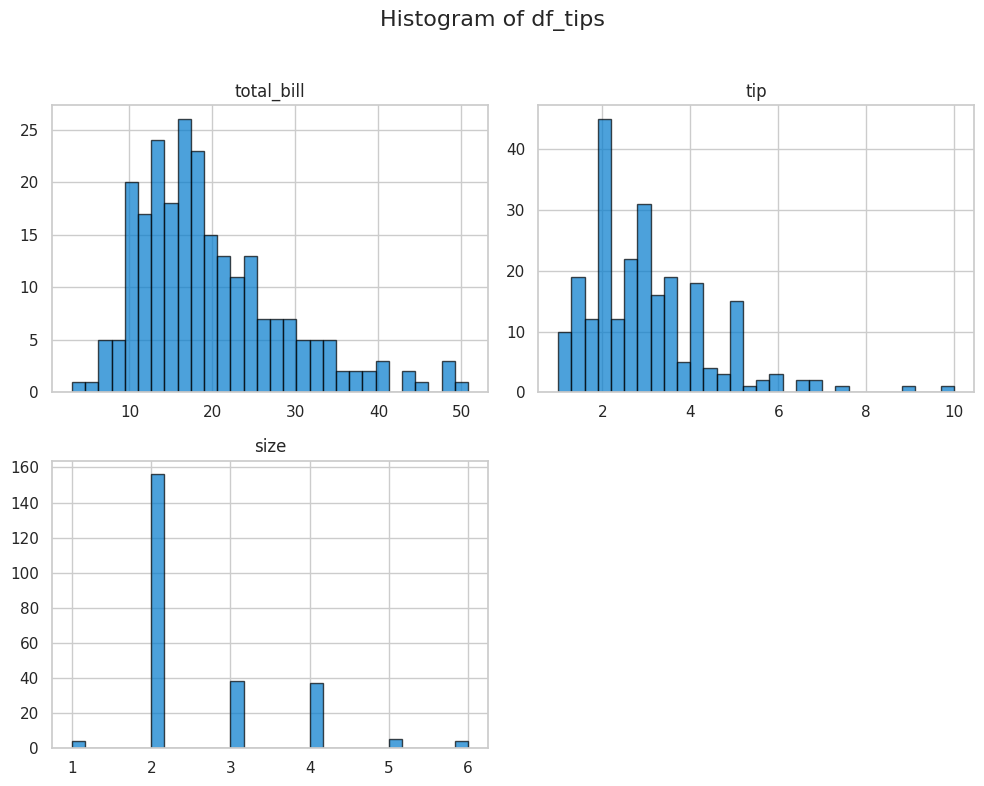

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Genel stil ayarları
sns.set(style="whitegrid")

# Histogram çizimi
df_tips.hist(bins=30, figsize=(10, 8), color='#007acc', edgecolor='black', alpha=0.7)

# Başlık ve etiket ayarları
plt.suptitle("Histogram of df_tips", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Görüntüleme
plt.show()

In [6]:
import plotly.express as px

figure = px.scatter(data_frame = df_tips, x="total_bill",
                    y="tip", size="size", color= "sex", trendline="ols")
figure.show()

In [7]:
figure = px.scatter(data_frame = df_tips, x="total_bill",
                    y="tip", size="size", color= "time", trendline="ols")
figure.show()

In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Alt alta 3 pie chart oluşturmak için 1 satır ve 3 sütunlu subplot yapısı oluşturuluyor
fig = make_subplots(rows=1, cols=3, specs=[[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]])

# 1. Pie chart: day sütununa göre
fig.add_trace(go.Pie(labels=df_tips['day'].unique(), values=df_tips.groupby('day')['tip'].sum(), hole=0.5),
              row=1, col=1)

# 2. Pie chart: sex sütununa göre
fig.add_trace(go.Pie(labels=df_tips['sex'].unique(), values=df_tips.groupby('sex')['tip'].sum(), hole=0.5),
              row=1, col=2)

# 3. Pie chart: smoker sütununa göre
fig.add_trace(go.Pie(labels=df_tips['smoker'].unique(), values=df_tips.groupby('smoker')['tip'].sum(), hole=0.5),
              row=1, col=3)

# Grafik başlıkları ekleniyor
fig.update_layout(height=400, title_text="Pie Charts for Day, Sex, and Smoker")

# Grafiği göster
fig.show()

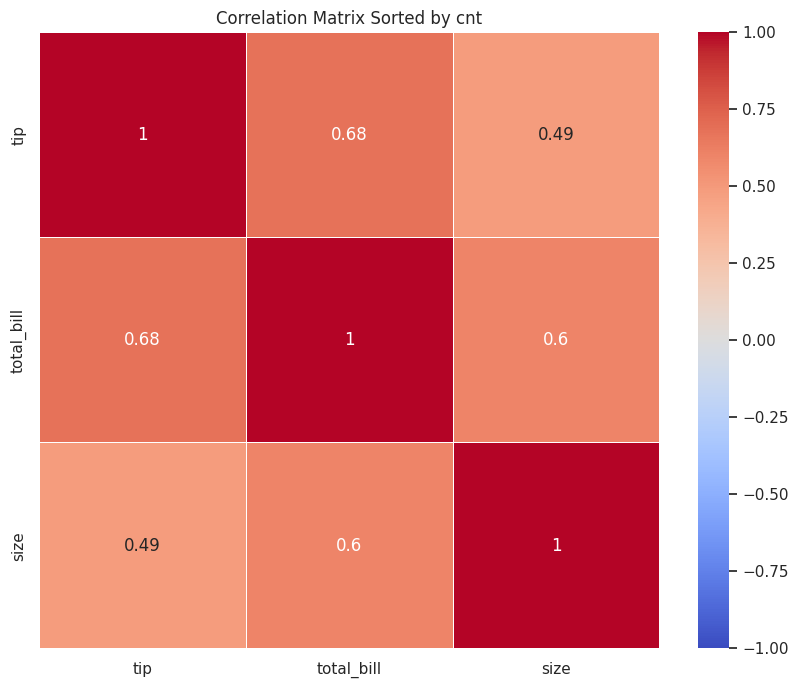

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


# Korelasyon matrisini oluştur ve 'cnt' sütununa göre sırala
corr_matrix = df_tips[['total_bill', 'tip', 'size']].corr()
sorted_corr = corr_matrix['tip'].sort_values(ascending=False)

# Korelasyon matrisinin sıralanmış sütunlarını seç
sorted_columns = sorted_corr.index

# Sıralanmış sütunlar için korelasyon matrisini yeniden oluştur
sorted_corr_matrix = df_tips[sorted_columns].corr()

# Seaborn ile heatmap (ısı haritası) oluştur
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Grafik başlığını ekle
plt.title('Correlation Matrix Sorted by cnt')
plt.show()

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

categ_columns = ['sex','smoker', 'day', 'time']


result = pd.DataFrame()

# ANOVA sonuçlarını analiz et ve bir DataFrame'e ekle
for col in categ_columns:
    model = ols(f'tip ~ C({col})', data=df_tips).fit()  # OLS modeli kur
    anova_table = sm.stats.anova_lm(model, typ=2)  # ANOVA testini yap
    
    # ANOVA tablosuna kolon ismini ekle ve sonuçları birleştir
    anova_table['Variable'] = col
    result = pd.concat([result, anova_table])

result

,sum_sq,df,F,PR(>F),Variable
C(sex),3.673534,1.0,1.926155,0.166456,sex
Residual,461.538943,242.0,NaN,NaN,sex
C(smoker),0.016351,1.0,0.008506,0.926593,smoker
Residual,465.196126,242.0,NaN,NaN,smoker
C(day),9.525873,3.0,1.672355,0.173589,day
Residual,455.686604,240.0,NaN,NaN,day
C(time),6.882181,1.0,3.633815,0.057802,time
Residual,458.330296,242.0,NaN,NaN,time


<Axes: >

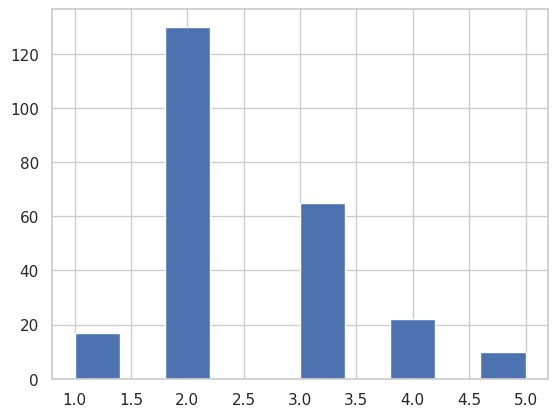

In [11]:
df_tips['total_bill_category'] = pd.cut(df_tips['total_bill'], bins=[0., 10, 20, 30, 40, 51], labels=[1, 2, 3, 4, 5])
df_tips['total_bill_category'].hist()

In [12]:
X = df_tips.drop(columns='tip')
y = df_tips['tip']

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

# Stratify kolonu: weather
stratify_col = df_tips['total_bill_category']

# Stratified splitting (eğitim ve test setlerini böler)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(X, stratify_col):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

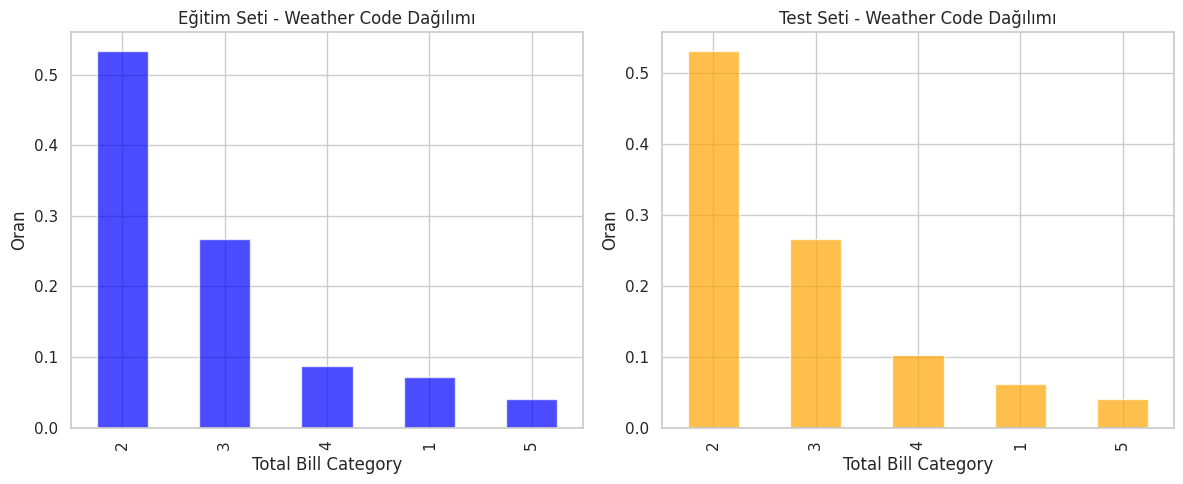

In [14]:
# Eğitim setinin histogramını oluştur
plt.figure(figsize=(12, 5))  # Figür boyutunu ayarlayın

# Eğitim seti histogramı
plt.subplot(1, 2, 1)  # 1 satır, 2 sütun, 1. grafik
X_train['total_bill_category'].value_counts(normalize=True).plot(kind='bar', color='blue', alpha=0.7)
plt.title('Eğitim Seti - Weather Code Dağılımı')
plt.xlabel('Total Bill Category')
plt.ylabel('Oran')

# Test seti histogramı
plt.subplot(1, 2, 2)  # 1 satır, 2 sütun, 2. grafik
X_test['total_bill_category'].value_counts(normalize=True).plot(kind='bar', color='orange', alpha=0.7)
plt.title('Test Seti - Weather Code Dağılımı')
plt.xlabel('Total Bill Category')
plt.ylabel('Oran')

# Grafiklerin gösterilmesi
plt.tight_layout()  # Aralıkları ayarlamak için
plt.show()

In [15]:
cat_columns = ['sex', 'smoker', 'day', 'time']

X_train = pd.get_dummies(X_train, columns=cat_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_columns, drop_first=True)

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# Özellikleri ölçeklendirme
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Modeller
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net': ElasticNet(),
    'SGD Regressor': SGDRegressor(max_iter=1000, tol=1e-3),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'Extra Trees': ExtraTreesRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'MLP Regressor': MLPRegressor(max_iter=2000, random_state=42),
    'Gaussian Process': GaussianProcessRegressor(random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=100, random_state=42, verbosity=-1)
}

# Sonuçları saklayacak liste
results = []

# Her model için döngü
for name, model in models.items():
    try:
        # Modeli eğitme
        model.fit(X_train, y_train)
        
        # Tahmin yapma
        y_pred = model.predict(X_test)
        
        # Metrikleri hesaplama
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        # Çapraz doğrulama
        cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
        cv_rmse = np.sqrt(-cv_scores)
        
        # Sonuçları listeye ekleme
        results.append({
            'Model': name,
            'RMSE': rmse,         
            'CV RMSE (Ort ± Std)': f"{cv_rmse.mean():.2f} ± {cv_rmse.std():.2f}"
        })
    except Exception as e:
        print(f"Hata: {name} modeli için bir sorun oluştu: {str(e)}")
        
# Sonuçları DataFrame'e dönüştürme ve RMSE'ye göre sıralama
results_df = pd.DataFrame(results).sort_values('RMSE')

numeric_columns = ['RMSE']
results_df[numeric_columns] = round(results_df[numeric_columns], 2)
results_df

,Model,RMSE,CV RMSE (Ort ± Std)
11,SVR,1.15,1.11 ± 0.16
1,Random Forest,1.18,1.04 ± 0.18
12,K-Nearest Neighbors,1.20,1.15 ± 0.20
8,Gradient Boosting,1.21,1.10 ± 0.10
5,Elastic Net,1.22,1.16 ± 0.20
2,XGBoost,1.23,1.08 ± 0.14
15,LightGBM,1.25,1.02 ± 0.13
10,Extra Trees,1.26,1.12 ± 0.17
6,SGD Regressor,1.27,0.97 ± 0.08
9,AdaBoost,1.27,1.05 ± 0.20


In [22]:
!pip install optuna
import optuna
import warnings

# FutureWarning uyarılarını kapat
warnings.filterwarnings("ignore", category=FutureWarning)

# Get the best model from results_df
best_model_name = results_df.iloc[0]['Model']

def get_param_space(trial, model_name):
    if model_name == 'XGBoost':
        return {
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'max_depth': trial.suggest_int('max_depth', 1, 30),
            'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
            'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        }
    elif model_name in ['Random Forest', 'Extra Trees']:
        return {
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'max_depth': trial.suggest_int('max_depth', 1, 30),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        }
    elif model_name == 'Gradient Boosting':
        return {
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
            'max_depth': trial.suggest_int('max_depth', 1, 30),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        }
    elif model_name in ['Ridge Regression', 'Lasso Regression', 'Elastic Net']:
        return {
            'alpha': trial.suggest_loguniform('alpha', 1e-5, 1e5),
        }
    elif model_name == 'SVR':
        return {
            'C': trial.suggest_loguniform('C', 1e-5, 1e5),
            'epsilon': trial.suggest_loguniform('epsilon', 1e-5, 1e2),
            'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'sigmoid']),
        }
    elif model_name == 'K-Nearest Neighbors':
        return {
            'n_neighbors': trial.suggest_int('n_neighbors', 1, min(50, X_train_scaled.shape[0])),
            'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        }
    elif model_name == 'MLP Regressor':
        return {
            'hidden_layer_sizes': trial.suggest_categorical('hidden_layer_sizes', [(50,), (100,), (50, 50), (100, 50)]),
            'alpha': trial.suggest_loguniform('alpha', 1e-5, 1e2),
            'learning_rate_init': trial.suggest_loguniform('learning_rate_init', 1e-5, 1e-1),
        }
    elif model_name == 'Linear Regression':
        return {
            'fit_intercept': trial.suggest_categorical('fit_intercept', [True, False]),
            'normalize': trial.suggest_categorical('normalize', [True, False]),
        }
    elif model_name == 'Gaussian Process':
        return {
            'alpha': trial.suggest_loguniform('alpha', 1e-10, 1e1),
            'n_restarts_optimizer': trial.suggest_int('n_restarts_optimizer', 0, 10),
            'kernel': trial.suggest_categorical('kernel', ['RBF', 'Matern', 'RationalQuadratic', 'ExpSineSquared']),
        }
    else:
        return {}

def get_model(model_name, params):
    if model_name == 'XGBoost':
        return XGBRegressor(**params, random_state=42)
    elif model_name == 'Random Forest':
        return RandomForestRegressor(**params, random_state=42)
    elif model_name == 'Extra Trees':
        return ExtraTreesRegressor(**params, random_state=42)
    elif model_name == 'Gradient Boosting':
        return GradientBoostingRegressor(**params, random_state=42)
    elif model_name == 'Ridge Regression':
        return Ridge(**params, random_state=42)
    elif model_name == 'Lasso Regression':
        return Lasso(**params, random_state=42)
    elif model_name == 'Elastic Net':
        return ElasticNet(**params, random_state=42)
    elif model_name == 'SVR':
        return SVR(**params)
    elif model_name == 'K-Nearest Neighbors':
        return KNeighborsRegressor(**params)
    elif model_name == 'MLP Regressor':
        return MLPRegressor(**params, random_state=42, max_iter=1000)
    elif model_name == 'Linear Regression':
        return LinearRegression()
    elif model_name == 'Decision Tree':
        return DecisionTreeRegressor(random_state=42)
    elif model_name == 'AdaBoost':
        return AdaBoostRegressor(random_state=42)
    elif model_name == 'Gaussian Process':
        return GaussianProcessRegressor(random_state=42)
    else:
        raise ValueError(f"Unsupported model: {model_name}")

# Define the objective function for Optuna
def objective(trial):
    params = get_param_space(trial, best_model_name)
    model = get_model(best_model_name, params)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

optuna.logging.set_verbosity(optuna.logging.WARNING)

# Optimize hyperparameters
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
print("Best parameters:", best_params, f"Best model: {best_model_name}")

Best parameters: {'C': 1.5313963601530247, 'epsilon': 0.0029062121879324977, 'kernel': 'rbf'} Best model: SVR


In [23]:
# En iyi parametrelerle modeli oluştur ve eğit
best_model = get_model(best_model_name, best_params)

# Modeli eğit
best_model.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yap
y_pred = best_model.predict(X_test)

# Performans metriğini hesapla (örneğin RMSE)
best_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Best model: {best_model_name}")
print(f"Test RMSE: {best_rmse}")

Best model: SVR
Test RMSE: 1.143430402841787
